
 ## Introduction
 
LGD is the percentage of the exposure that was lost after the borrower defaulted. It is percent of exposure that is not recovered. It means :

    LGD = 1 - recovery rate

EAD is the amount of exposure at the moment borrower defaulted. It's the max amount a bank may lose when borrower defaults. 
    
    EAD = Total Amount Funded * Credit Conversion Factor

Credit Conversion Factor (CCF) is the proportion of total exposure at the moment of default. 'Total recovered principal' reflects the total payments made on the princiapl of the loan. CCF is the proportion of the original amount of the loan that is still outstanding when the borrower defaulted.
    
    CCF = (Credit Amount - Recovered Principle)/Credit Amount

Dependent Variables in

    Recovery rate is dependent variable in LGD models. 
    CCF is dependent variable in EAD models. 
    Both Recovery rate and CCF have range between 0-1.

LGD and EAD are calculated only for defaulted cases and not for non-default cases.

    EAD = CCF * Funded Amount
    EL = PD * LGD * EAD



# LGD, EAD & EL Models

Topics Covered Here
    1. Loading the Libraries & Dataset
    2. Data Summary
    3. Data Visualization
    4. Missing Value Treatment
    5. Dependent Variables
    6. Explore Dependent Variables Visually
    7. LGD Model
        A- Stage1- Logistic Regression
        B- Stage2- Linear Regression
        C- Combining Both Steps
    8. EAD Model




## 1. Loading the Libraries & Dataset

In [1]:
#import some necessary librairies

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

color = sns.color_palette()
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) #Limiting floats output to 3 decimal points
os.getcwd()

'C:\\Users\\sohai\\Desktop\\My Personal\\1. FinTech\\Stephanie\\Credit Risk'

<Figure size 864x576 with 0 Axes>

In [2]:
#Change the working directory
%cd "C:\Users\sohai\Desktop\My Personal\1. FinTech\Stephanie\Credit Risk"
print(os.listdir())

C:\Users\sohai\Desktop\My Personal\1. FinTech\Stephanie\Credit Risk
['.ipynb_checkpoints', '3.A- Binning of Variables.ipynb', '3.B- PD & Scorecard Model.ipynb', '3.C- Population Stability Index.ipynb', '4. LGD, EAD & EL Models.ipynb', 'German binned_data.xlsx', 'German Credit Data.xlsx', 'German Credit Final CRM.xlsx', 'lgd_model_stage_2.sav', 'pd_model.sav', 'reg_lgd.sav', 'scorecard values.xlsx', 'Test Set Score.csv']


In [3]:
#Now let's import and put the train and test datasets in  pandas dataframe

#df = pd.read_excel("German Credit Data.xlsx", sheet_name= 'input', date_parser=True)
#df.head(3)

In [4]:
df = 'https://raw.githubusercontent.com/TheJuniorLebowski/Data/master/German%20Credit%20Data.csv'


# Since it has both CRM training data and PSI data, we only need CRM training data.
df = pd.read_csv(df)
df = df[df['type']== 'CRM Data']
df = df.drop(['type'], axis=1)
df.head(4)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount,Recovered_Principle,Recoveries
0,67,male,2,own,NaN,little,6,radio/TV,good,17000,17000.00,0.00
1,22,female,2,own,little,moderate,48,radio/TV,bad,11000,9942.67,0.00
2,49,male,1,own,little,NaN,12,education,good,32200,32200.00,0.00
3,45,male,2,free,little,little,42,furniture/equipment,good,12000,12000.00,0.00


Variables Description

    1. Age (numeric)
    2. Sex (text: male, female)
    3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
    4. Housing (text: own, rent, or free)
    5. Saving accounts (text - little, moderate, quite rich, rich)
    6. Checking account (numeric, in DM - Deutsch Mark)
    7. Duration (numeric, in month)
    8. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
    9. Risk (good or bad. bad means default. Dependent Variable)
    10. Credit amount (numeric, in DM)
    11. Recovered Principle- Amount of Princeiple recovred from bad cases
    12. Recoveries- Total recoveries made from bad cases
    



## 2. Data Summary

As we can see below, summary is shown only for numeric variables

In [5]:
# Summary of numerica variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,901.00,35.55,11.46,19.00,27.00,33.00,42.00,75.00
Job,901.00,1.90,0.65,0.00,2.00,2.00,2.00,3.00
Duration,901.00,20.72,12.01,4.00,12.00,18.00,24.00,72.00
Credit amount,901.00,14001.05,8391.89,1000.00,7200.00,12000.00,20000.00,35000.00
Recovered_Principle,901.00,9971.30,9698.99,0.00,708.24,8000.00,15450.00,35000.00
Recoveries,901.00,511.83,1162.37,0.00,0.00,0.00,0.00,5201.51


In [6]:
df.shape

(901, 12)

There are numeric as well categorical variables. We would have to convert the categorical variables into numeric using one hot encoding to train the model. We do this later on. Let's analyze the data 1st

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  901 non-null    int64  
 1   Sex                  901 non-null    object 
 2   Job                  901 non-null    int64  
 3   Housing              901 non-null    object 
 4   Saving accounts      738 non-null    object 
 5   Checking account     545 non-null    object 
 6   Duration             901 non-null    int64  
 7   Purpose              901 non-null    object 
 8   Risk                 901 non-null    object 
 9   Credit amount        901 non-null    int64  
 10  Recovered_Principle  901 non-null    float64
 11  Recoveries           901 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 91.5+ KB


## 3. Data Visualization

Correlation is defined as linear relationship between two random variables. It's fine an independent and dependent having significant. 

Correlation between independent variables (aka multi-collinearity) is problematic because it undermines the statistical significance of an independent variable. Other things being equal, the larger the standard error of a regression coefficient, the less likely it is that this coefficient will be statistically significant. 

We can remove features with significant correlation. In this notebook, we remove the unnecessary and variables with high correlation in feature selection step

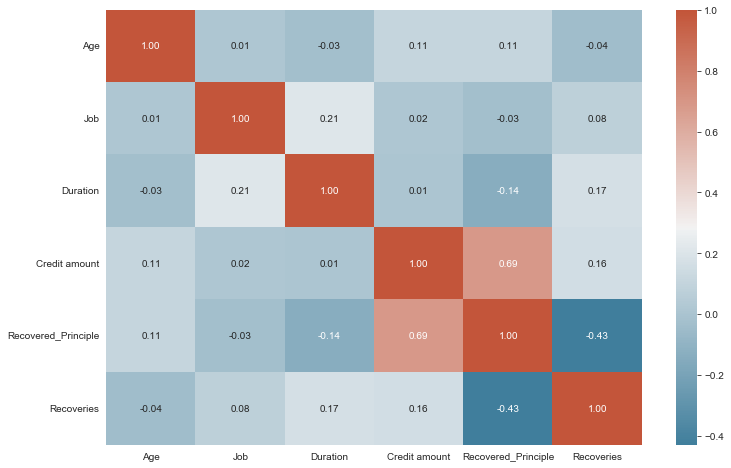

In [8]:
# Correlation matrix
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

In [9]:
# Correlation values
df.corr()

,Age,Job,Duration,Credit amount,Recovered_Principle,Recoveries
Age,1.00,0.01,-0.03,0.11,0.11,-0.04
Job,0.01,1.00,0.21,0.02,-0.03,0.08
Duration,-0.03,0.21,1.00,0.01,-0.14,0.17
Credit amount,0.11,0.02,0.01,1.00,0.69,0.16
Recovered_Principle,0.11,-0.03,-0.14,0.69,1.00,-0.43
Recoveries,-0.04,0.08,0.17,0.16,-0.43,1.00




LGD and EAD can be get only for borrowers that defaulted. Hence, it wouldnt be a good idea to keep all the borrowers in the dataset.

It's not a good idea to keep all the defaulted borrowers for LGD and EAD calculation. THis is because, after a borrower has defaulted, she can still make the payment. Therefore, when building LGD & EAD models, it's a good practice to build models with data from borrowers that have had enough time to repay part of the remaining debt

In our dataset, these are only the accounts that were written-off, their loan status is 'charged-off' and 'Does not meet the credit policy. Status:Charged-off'


In [10]:
# Here we take only the accounts that were charged-off (written-off)
df1 = df[df['Risk'].isin(['bad'])]
df1.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount,Recovered_Principle,Recoveries
1,22,female,2,own,little,moderate,48,radio/TV,bad,11000,9942.67,0.00
4,53,male,2,free,little,little,24,car,bad,7000,167.56,0.00
9,28,male,3,own,little,moderate,30,car,bad,10000,235.76,0.00


## 4. Missing Value Treatment

    1. We delete any variable which has more than 20% of the observations as missing value. We already did this 
    2. We replace the missing value of a numeric variable with its median values
    3. We replace the missing value of a categorical variable with its modal values

    

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data.head(20)

,Total Missing,Percent Missing
Checking account,356,0.40
Saving accounts,163,0.18
Recoveries,0,0.00
Recovered_Principle,0,0.00
Credit amount,0,0.00
Risk,0,0.00
Purpose,0,0.00
Duration,0,0.00
Housing,0,0.00
Job,0,0.00


In [12]:
# Delete any variable that has more than 20% of the data as missing. We already did this above
#df = df.dropna(thresh=0.8*len(df), axis=1)
#df.isnull().sum()

In [13]:
# Replace missing values with median in numeric variables
for col in df.select_dtypes(include=np.number):
    df[col] = df[col].fillna(df[col].median())
    

df.isnull().sum()

Age                      0
Sex                      0
Job                      0
Housing                  0
Saving accounts        163
Checking account       356
Duration                 0
Purpose                  0
Risk                     0
Credit amount            0
Recovered_Principle      0
Recoveries               0
dtype: int64

In [14]:
# Replace missing values with mode for categorical variables
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)
    

df.isnull().sum()

Age                    0
Sex                    0
Job                    0
Housing                0
Saving accounts        0
Checking account       0
Duration               0
Purpose                0
Risk                   0
Credit amount          0
Recovered_Principle    0
Recoveries             0
dtype: int64


## 5. Dependent Variables

We need recovery rate. Let's assume that when borrower default the total funded amount was lost. We also have a recoveries column. We divide recoveries by funded amount and get recovery rate. Recovery rate is our dependent variables for LGD model


In [15]:
df1['recovery_rate'] = df1['Recoveries'] / df1['Credit amount']
# We calculate the dependent variable for the LGD model: recovery rate.
# It is the ratio of recoveries and funded amount.
df1.head(3)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Duration,Purpose,Risk,Credit amount,Recovered_Principle,Recoveries,recovery_rate
1,22,female,2,own,little,moderate,48,radio/TV,bad,11000,9942.67,0.00,0.00
4,53,male,2,free,little,little,24,car,bad,7000,167.56,0.00,0.00
9,28,male,3,own,little,moderate,30,car,bad,10000,235.76,0.00,0.00


In [16]:
df1['recovery_rate'].describe()
# Shows some descriptive statisics for the values of a column.



count   269.00
mean      0.13
std       0.10
min       0.00
25%       0.00
50%       0.17
75%       0.18
max       0.96
Name: recovery_rate, dtype: float64

Above we see min recovery rate is negative. Max recovery rate is 1.17. This is not possible and seems recoveries might have been incorrectly recorded. Recovery rate at max could be 1 or 100%. Any recovery rate that is greater than 1 would be truncated to 1 and where it isnt, keep the existing values. Any recovery that is lesser than 0 would be truncated to 0 and where it isnt, keep the existing values.

In [17]:
df1['recovery_rate'] = np.where(df1['recovery_rate'] > 1, 1, df1['recovery_rate'])
df1['recovery_rate'] = np.where(df1['recovery_rate'] < 0, 0, df1['recovery_rate'])
# We set recovery rates that are greater than 1 to 1 and recovery rates that are less than 0 to 0.
df1['recovery_rate'].describe()

count   269.00
mean      0.13
std       0.10
min       0.00
25%       0.00
50%       0.17
75%       0.18
max       0.96
Name: recovery_rate, dtype: float64

Below, if all is paid, CCF would be zero. if non is paid, then CCF would be 1. We calculate the dependent variable for the EAD model: credit conversion factor. It is the ratio of the difference of the amount used at the moment of default to the total funded amount.

In [18]:
df1['CCF'] = (df1['Credit amount'] - df1['Recovered_Principle']) / df1['Credit amount']
df1['CCF'].describe()

count   269.00
mean      0.96
std       0.06
min       0.10
25%       0.95
50%       0.97
75%       0.99
max       1.00
Name: CCF, dtype: float64

In [19]:
df1['CCF'] = np.where(df1['CCF'] > 1, 1, df1['CCF'])
df1['CCF'].describe()

count   269.00
mean      0.96
std       0.06
min       0.10
25%       0.95
50%       0.97
75%       0.99
max       1.00
Name: CCF, dtype: float64

## 6. Explore Dependent Variables Visually

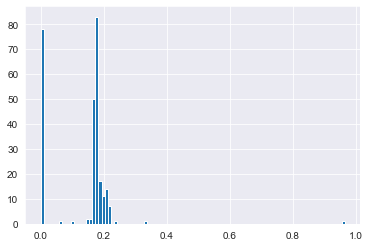

<Figure size 1296x720 with 0 Axes>

In [20]:
plt.hist(df1['recovery_rate'], bins = 100)
plt.figure(figsize=(18,10))
plt.show()
# We plot a histogram of a variable with 100 bins.

As we can see in below or above graph, amongst defaulted borrowers, half have the recovery rate of 0 and other half have greater than zero. Now, it makes even more sense to model LGD in two steps- 1st predict whether recovery rate is zero. 2nd- if it's not zero, predict the amount lost/recovered

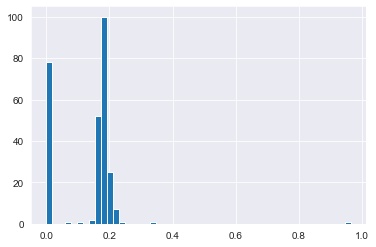

<Figure size 1296x720 with 0 Axes>

In [21]:
plt.hist(df1['recovery_rate'], bins = 50)
plt.figure(figsize=(18,10))
plt.show()

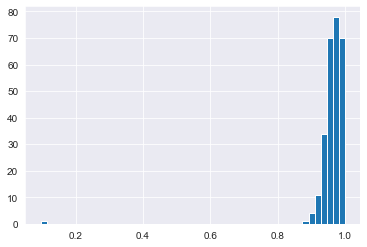

<Figure size 1296x720 with 0 Axes>

In [22]:
plt.hist(df1['CCF'], bins = 50)
plt.figure(figsize=(18,10))
plt.show()



Below we create a binary variables recovery_rate_0_1 which would be zero if the recovery rate is zero and 1 otherwise.


In [23]:
df1['recovery_rate_flag'] = np.where(df1['recovery_rate'] == 0, 0, 1)
# We create a new variable which is 0 if recovery rate is 0 and 1 otherwise.


df1['recovery_rate_flag'].value_counts()

1    191
0     78
Name: recovery_rate_flag, dtype: int64


## 7. LGD Model

Generally, beta regression is used for LGD. Beta regression is used if outcomes are strictly greater than zero and strictly lower than 1. However, python doesnt have a library to support beta regression. So, we do LGD in python in two parts

    Stage 1- predict whether recovery rate is zero or greater than zero- logistic regression
    Stage 2- If recovery rate is not zero then how much is loss given default value- linear regression


### Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
lgd_df = df1.drop(['Job','Risk', 'Recovered_Principle', 'Credit amount', 'Recoveries','Purpose',
                   'recovery_rate', 'CCF'], axis=1)


lgd_df.head(3)

,Age,Sex,Housing,Saving accounts,Checking account,Duration,recovery_rate_flag
1,22,female,own,little,moderate,48,0
4,53,male,free,little,little,24,0
9,28,male,own,little,moderate,30,0


In [26]:
lgd_df = pd.get_dummies(lgd_df, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account' ])
lgd_df.head(3)

,Age,Duration,recovery_rate_flag,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
1,22,48,0,1,0,0,1,0,1,0,0,0,0,1,0
4,53,24,0,0,1,1,0,0,1,0,0,0,1,0,0
9,28,30,0,0,1,0,1,0,1,0,0,0,0,1,0


In [27]:
ref_categories_lgd = ['Sex_female', 'Housing_free', 'Saving accounts_little',  'Checking account_little']


In [28]:
Y = lgd_df.loc[:, 'recovery_rate_flag']
lgd_df = lgd_df.drop(['recovery_rate_flag'], axis=1)
X = lgd_df
print(X.shape)

(269, 14)


In [29]:
# Partition the dataset in train + validation sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))


X_train : (215, 14)
X_test : (54, 14)
y_train : (215,)
y_test : (54,)


In [30]:
X_train = X_train.drop(ref_categories_lgd, axis=1)
X_train.head(3)

,Age,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich
739,26,30,0,0,1,1,0,0,1,0
54,57,36,1,0,0,0,0,0,1,0
759,35,12,1,1,0,0,0,0,0,0


### 7.A- Stage 1- Logistic Regression

In [31]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = p_values
        #self.sigma_estimates = sigma_estimates
        #self.F_ij = F_ij

In [32]:
reg = LogisticRegression_with_p_values()
reg.fit(X_train, y_train)


In [33]:
# Same as above.
feature_name = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()


# We add the 'p_values' here, just as we did before.
p_values = reg.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,1.24,nan
1,Age,-0.01,0.27
2,Duration,0.00,0.91
3,Sex_male,-0.11,0.75
4,Housing_own,0.02,0.96
5,Housing_rent,-0.53,0.18
6,Saving accounts_moderate,0.04,0.94
7,Saving accounts_quite rich,-0.69,0.46
8,Saving accounts_rich,0.80,0.53
9,Checking account_moderate,0.47,0.17


In [34]:
X_test = X_test.drop(ref_categories_lgd, axis=1)

In [35]:
y_pred_test = reg.model.predict(X_test)
y_pred_test[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
y_proba_test = reg.model.predict_proba(X_test)
y_proba_test = y_proba_test[: ][: , 1]
y_proba_test[:10]

array([0.70415482, 0.84716441, 0.65819796, 0.74415087, 0.72823683,
       0.80193392, 0.7352359 , 0.70044157, 0.72120222, 0.62434158])

In [37]:
# We save the data frame into a temporary dataset and then reset the indices
y_test_temp = y_test.copy()


y_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

df_actual_pred = pd.concat([y_test_temp, pd.DataFrame(y_proba_test)], axis = 1)
# Concatenates two dataframes.


# We rename the columns here
df_actual_pred.columns = ['Actual', 'Predicted_Prob']

df_actual_pred.index = y_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

df_actual_pred.head()

,Actual,Predicted_Prob
840,0,0.70
721,1,0.85
268,1,0.66
610,1,0.74
603,1,0.73


### Estimating the Аccuracy of the Мodel

 We create a new column with an indicator,
 where every observation that has predicted probability greater than the threshold has a value of 1,
 and every observation that has predicted probability lower than the threshold has a value of 0.

In [38]:
tr = 0.5

df_actual_pred['Predicted_class'] = np.where(df_actual_pred['Predicted_Prob'] > tr, 1, 0)



In [39]:
pd.crosstab(df_actual_pred['Actual'], df_actual_pred['Predicted_class'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,0,14
1,1,39


In [40]:
pd.crosstab(df_actual_pred['Actual'], df_actual_pred['Predicted_class'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.00,0.26
1,0.02,0.72


In [41]:
(pd.crosstab(df_actual_pred['Actual'], df_actual_pred['Predicted_class'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_pred['Actual'], df_actual_pred['Predicted_class'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_pred.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.7222222222222222

AUC Value:  0.54


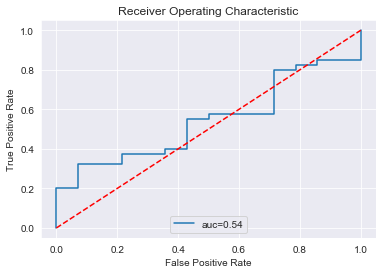

In [42]:
# ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Keeping the predicted probabilities for outcome (1 or liver patient) only
#y_pred_proba = final_model.predict_proba(X_test_std)[::,1]


fpr, tpr, _ = roc_curve(y_test,  y_proba_test)
auc = roc_auc_score(y_test, y_proba_test)
auc = float("{:.2f}".format(auc))
print("AUC Value: ", auc)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=8)
plt.show()



AUC is 54%; not that good. Anyways, it is more important to have a large proportion of correctly classified values that are greater than 0, than to have correctly classified 0s. This is becayse we use greater than 0s for our LGD model.

Also, during the 2nd stage regression model, some of the values classified as greater than 1 may be estimated to be = 0, thus correcting the current misclassification


In [43]:
import pickle
pickle.dump(reg, open('reg_lgd.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.

### 7.B- Stage 2- Linear Regression




In [44]:
df_stage2 = df1[df1['recovery_rate_flag'] == 1]
# Here we take only rows where the original recovery rate variable is greater than zero,
# i.e. where the indicator variable we created is equal to 1.

In [45]:
df_stage2 = df_stage2.drop(['Job','Risk', 'Credit amount', 'Recovered_Principle','Recoveries','Purpose',
                   'recovery_rate_flag', 'CCF'], axis=1)


df_stage2 = pd.get_dummies(df_stage2, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account' ])
lgd_df.head(3)


Y1 = df_stage2.loc[:, 'recovery_rate']
df_stage2 = df_stage2.drop(['recovery_rate'], axis=1)
X1 = df_stage2
print(X.shape)


# Partition the dataset in train + validation sets
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
X_train1 = X_train1.drop(ref_categories_lgd, axis=1)

print("X_train1 : " + str(X_train1.shape))
print("X_test1 : " + str(X_test1.shape))
print("y_train1 : " + str(y_train1.shape))
print("y_test1 : " + str(y_test1.shape))

(269, 14)
X_train1 : (152, 10)
X_test1 : (39, 14)
y_train1 : (152,)
y_test1 : (39,)


In [46]:
X_train1.columns

Index(['Age', 'Duration', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich'],
      dtype='object')

In [47]:
ref_categories_lgd

['Sex_female',
 'Housing_free',
 'Saving accounts_little',
 'Checking account_little']

In [48]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Since we are using an object oriented language such as Python, we can simply define our own 
# LinearRegression class (the same one from sklearn)
# By typing the code below we will ovewrite a part of the class with one that includes p-values
# Here's the full source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self
    

In [50]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self
    

In [51]:
reg_stage2 = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_stage2.fit(X_train1, y_train1)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
feature_name1 = X_train1.columns.values
summary_table1 = pd.DataFrame(columns = ['Feature name'], data = feature_name1)
summary_table1['Coefficients'] = np.transpose(reg_stage2.coef_)
summary_table1.index = summary_table1.index + 1
summary_table1.loc[0] = ['Intercept', reg_stage2.intercept_]
summary_table1 = summary_table1.sort_index()


# We add the 'p_values' here, just as we did before.
p_values1 = reg_stage2.p
p_values1 = np.append(np.nan,np.array(p_values1))
summary_table1['p_values'] = p_values1
summary_table1
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,0.20,nan
1,Age,-0.00,0.15
2,Duration,0.00,0.62
3,Sex_male,-0.02,0.15
4,Housing_own,0.01,0.54
5,Housing_rent,-0.01,0.50
6,Saving accounts_moderate,-0.01,0.47
7,Saving accounts_quite rich,0.01,0.88
8,Saving accounts_rich,0.01,0.86
9,Checking account_moderate,0.02,0.15


In [53]:
X_test1 = X_test1.drop(ref_categories_lgd, axis=1)

In [54]:
y_pred1 = reg_stage2.predict(X_test1)
y_pred1

array([0.17101391, 0.17578054, 0.20343471, 0.19489367, 0.17847318,
       0.20191868, 0.19767015, 0.21214482, 0.20508637, 0.18609313,
       0.1771451 , 0.20293136, 0.19403617, 0.188491  , 0.18140685,
       0.15223297, 0.19499659, 0.1791215 , 0.17093708, 0.18288584,
       0.20393226, 0.15397207, 0.15124356, 0.20382933, 0.20046487,
       0.18087881, 0.21541835, 0.2107145 , 0.19763584, 0.1791182 ,
       0.17879564, 0.1695387 , 0.1722277 , 0.21099345, 0.18184846,
       0.15864398, 0.17214707, 0.21811337, 0.18092922])

In [55]:
y_train1

63    0.18
543   0.20
444   0.18
446   0.18
552   0.17
      ... 
505   0.18
333   0.19
555   0.18
236   0.17
754   0.16
Name: recovery_rate, Length: 152, dtype: float64

In [56]:
# We save the data frame into a temporary dataset and then reset the indices
y_test_temp1 = y_test1.copy()


y_test_temp1.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

df_reg_pred = pd.concat([y_test_temp1, pd.DataFrame(y_pred1)], axis = 1)
# Concatenates two dataframes.


# We rename the columns here
df_reg_pred.columns = ['Actual', 'Predicted_reg']

df_reg_pred.index = y_test1.index
# Makes the index of one dataframe equal to the index of another dataframe.

df_reg_pred.head()

,Actual,Predicted_reg
535,0.22,0.17
368,0.18,0.18
721,0.17,0.20
474,0.19,0.19
598,0.17,0.18


In [57]:

pd.concat([y_test_temp1, pd.DataFrame(y_pred1)], axis = 1).corr()
# We calculate the correlation between actual and predicted values estimate whether our model is good enough


,recovery_rate,0
recovery_rate,1.00,0.03
0,0.03,1.00


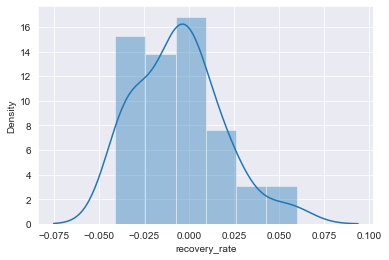

In [58]:
sns.distplot(y_test_temp1 - y_pred1)
plt.show()
# We plot the distribution of the residuals.

In [59]:

pickle.dump(reg_stage2, open('lgd_model_stage_2.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'lgd_model_stage_1.sav'.


### 7.C- Combining Stage 1 &  2

Recovery rates above, estimated by linear regression, no matter if they were predicted to be 0 or 1 by the 1st stage

In [60]:
y_pred_all = reg_stage2.predict(X_test)
y_pred_all

array([0.18331664, 0.20343471, 0.1695387 , 0.18760166, 0.20125042,
       0.20249838, 0.1913895 , 0.17574222, 0.1748263 , 0.16851891,
       0.17062584, 0.20046487, 0.18202   , 0.15397207, 0.18426156,
       0.18621514, 0.18529147, 0.16570331, 0.18419208, 0.1802809 ,
       0.1863422 , 0.1860779 , 0.18422725, 0.17178163, 0.16042699,
       0.19279153, 0.17841979, 0.20393226, 0.19894824, 0.17684367,
       0.19957925, 0.18202   , 0.20508637, 0.18414817, 0.20031682,
       0.16522498, 0.16387088, 0.18545727, 0.20298952, 0.17086846,
       0.1715854 , 0.19865715, 0.18292015, 0.19663277, 0.19403617,
       0.18951918, 0.18240907, 0.19760068, 0.21811337, 0.20293136,
       0.16410144, 0.1628899 , 0.17898426, 0.17143014])



We can get the predicted recovery rates by multiplying the model from stage 1 and stage 2. Think about it. Wherever there is a 0 predicted by the first model, all values predicted by the second model are multiplied by it will remain 0, and wherever there is 1 , all valued predicted by the 2nd model are multiplied by 1 so they'll remain the same.

In [61]:
y_pred_lgd_final = y_pred_all * y_pred_test
pd.DataFrame(y_pred_lgd_final).describe()

,0
count,54.00
mean,0.18
std,0.03
min,0.00
25%,0.17
50%,0.18
75%,0.20
max,0.22


In [62]:
y_pred_lgd_final = np.where(y_pred_lgd_final < 0, 0, y_pred_lgd_final)
y_pred_lgd_final = np.where(y_pred_lgd_final > 1, 1, y_pred_lgd_final)
# We set predicted values that are greater than 1 to 1 and predicted values that are less than 0 to 0.


## 8. EAD Model

Estimation and Interpretation

In [63]:
df_ead = df1.drop(['Job','Risk', 'Credit amount', 'Recovered_Principle','Recoveries','Purpose',
                   'recovery_rate_flag', 'recovery_rate'], axis=1)


df_ead = pd.get_dummies(df_ead, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account' ])


Y2 = df_ead.loc[:, 'CCF']
df_ead = df_ead.drop(['CCF'], axis=1)
X2 = df_ead
print(X2.shape)


# Partition the dataset in train + validation sets
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

X_train2 = X_train2.drop(ref_categories_lgd, axis=1)

print("X_train2 : " + str(X_train2.shape))
print("X_test2 : " + str(X_test2.shape))
print("y_train2 : " + str(y_train2.shape))
print("y_test2 : " + str(y_test2.shape))

(269, 14)
X_train2 : (215, 10)
X_test2 : (54, 14)
y_train2 : (215,)
y_test2 : (54,)


In [64]:

reg_ead = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_ead.fit(X_train2, y_train2)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
feature_name2 = X_train2.columns.values
summary_table2 = pd.DataFrame(columns = ['Feature name'], data = feature_name2)
summary_table2['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table2.index = summary_table2.index + 1
summary_table2.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table2 = summary_table2.sort_index()


# We add the 'p_values' here, just as we did before.
p_values2 = reg_ead.p
p_values2 = np.append(np.nan,np.array(p_values2))
summary_table2['p_values'] = p_values2
summary_table2
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,0.96,nan
1,Age,0.00,0.13
2,Duration,-0.00,0.00
3,Sex_male,0.01,0.22
4,Housing_own,0.00,0.68
5,Housing_rent,0.00,0.70
6,Saving accounts_moderate,0.01,0.58
7,Saving accounts_quite rich,0.00,0.93
8,Saving accounts_rich,0.00,0.93
9,Checking account_moderate,-0.01,0.23


### Model Validation

In [66]:
X_test2 = X_test2.drop(ref_categories_lgd, axis=1)
y_pred_ead = reg_ead.predict(X_test2)
y_pred_ead

array([0.95740652, 0.96374692, 0.98574961, 0.97492679, 0.94524805,
       0.95426563, 0.94647933, 0.97310974, 0.95680802, 0.95022114,
       0.95614955, 0.96009309, 0.96791823, 0.98586042, 0.96400102,
       0.95510018, 0.97162256, 0.96704587, 0.97289982, 0.96930204,
       0.94961472, 0.96468935, 0.96639832, 0.96848766, 0.99206826,
       0.97567875, 0.95903882, 0.93416473, 0.91902901, 0.9663134 ,
       0.94870351, 0.96791823, 0.96972731, 0.95922073, 0.94652152,
       0.9712857 , 0.99169794, 0.9313589 , 0.94386425, 0.98627151,
       0.97622106, 0.96627148, 0.96493785, 0.9636729 , 0.94189751,
       0.9640626 , 0.96060453, 0.96000214, 0.94395223, 0.96063101,
       0.9588405 , 0.98314009, 0.97981375, 0.97819822])

In [67]:
# We save the data frame into a temporary dataset and then reset the indices
y_test_temp2 = y_test2.copy()


y_test_temp2.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

df_ead_pred = pd.concat([y_test_temp2, pd.DataFrame(y_pred_ead)], axis = 1)
# Concatenates two dataframes.


# We rename the columns here
df_ead_pred.columns = ['Actual', 'Predicted_reg']

df_ead_pred.index = y_test2.index
# Makes the index of one dataframe equal to the index of another dataframe.

df_ead_pred.head()

,Actual,Predicted_reg
840,0.99,0.96
721,0.95,0.96
268,0.96,0.99
610,0.95,0.97
603,0.96,0.95


In [68]:
pd.concat([y_test_temp2, pd.DataFrame(y_pred_ead)], axis = 1).corr()
# We calculate the correlation between actual and predicted values.

,CCF,0
CCF,1.00,-0.04
0,-0.04,1.00


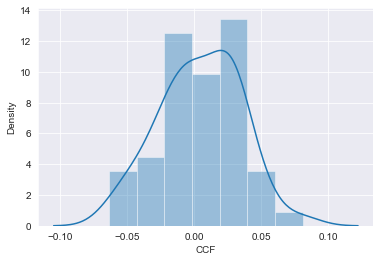

In [69]:
# Linear regression residuals are symmetrically distributed around the mean zero. It looks like a good model.

sns.distplot(y_test_temp2 - y_pred_ead)
plt.show()
# We plot the distribution of the residuals.





Predicted EAD cant be greater than 1 or less than 1. We can greater than 1 if linear regression is not constraint to give values between 0-1 despite being trained on a variable that had values between 0-1.

In such a scenario, we replace values less than 0 to 0 and all the values greater than 1 to 1.


In [70]:
pd.DataFrame(y_pred_ead).describe()
# Shows some descriptive statisics for the values of a column.

,0
count,54.00
mean,0.96
std,0.01
min,0.92
25%,0.96
50%,0.96
75%,0.97
max,0.99



## 8. Expected Loss

Banks/NBFCs really dont care about expected loss from an individual borrower. That's why we find the total expected loss across all the borrowers or in portfolio.

Below, we make the prediction for LGD where LGD = 1 - recovery rate. Then we calculate EAD where EAD = CCF * Funded Amount. Then finally, we merged our train and test to calculate PD model

     LGD = 1 - recovery rate
     EAD = CCF * Funded Amount
     EL = PD * LGD * EAD



In [71]:
df_EL = df1.copy()

# Here we take only the accounts that were charged-off (written-off)
df_EL = df_EL[df_EL['Risk'].isin(['bad'])]
df_EL = df_EL.drop(['Job', 'Purpose', 'Risk'], axis=1)

df_EL = pd.get_dummies(df_EL, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account'])
df_EL = df_EL.drop(ref_categories_lgd, axis=1)
df_EL.head(3)


,Age,Duration,Credit amount,Recovered_Principle,Recoveries,recovery_rate,CCF,recovery_rate_flag,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich
1,22,48,11000,9942.67,0.00,0.00,0.10,0,0,1,0,0,0,0,1,0
4,53,24,7000,167.56,0.00,0.00,0.98,0,1,0,0,0,0,0,0,0
9,28,30,10000,235.76,0.00,0.00,0.98,0,1,1,0,0,0,0,1,0


In [72]:
df_EL1 = df_EL.copy()
df_EL1 = df_EL1.drop(['Credit amount', 'Recovered_Principle', 'Recoveries', 'recovery_rate', 'CCF'], axis=1)
df_EL1.columns

Index(['Age', 'Duration', 'recovery_rate_flag', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich'],
      dtype='object')

In [73]:
X_train.columns

Index(['Age', 'Duration', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich'],
      dtype='object')

In [74]:

Y_EL1 = df_EL1.loc[:, 'recovery_rate_flag']
X_EL1 = df_EL1.drop(['recovery_rate_flag'], axis=1)


In [75]:
recovery_rate_stage1 = reg.model.predict(X_EL1)
recovery_rate_stage1[:5]

array([1, 1, 1, 1, 1])

In [76]:
#df_EL1 = df_EL1[df_EL1['recovery_rate_flag'] == 1]
"""# Here we do not take only rows where the original recovery rate variable is greater than zero, i.e. where the
indicator variable we created is equal to 1. Even if predict a value, it wuld be multiplied by predictd 
probabiltiy (0) and would become zero."""

# we add a variable recovery rate in the df_EL1
df_EL1['recovery_rate'] = df_EL['recovery_rate']


Y2 = df_EL1.loc[:, 'recovery_rate']
df_EL1 = df_EL1.drop(['recovery_rate', 'recovery_rate_flag'], axis=1)
X2 = df_EL1.copy()
print(X2.columns.values)

['Age' 'Duration' 'Sex_male' 'Housing_own' 'Housing_rent'
 'Saving accounts_moderate' 'Saving accounts_quite rich'
 'Saving accounts_rich' 'Checking account_moderate'
 'Checking account_rich']


In [77]:
recovery_rate_stage2 = reg_stage2.predict(X2)
recovery_rate_stage2[:5]

array([0.22476454, 0.15942798, 0.2002482 , 0.19760154, 0.18796946])

In [78]:
# Final recovery rate should be between 
df_EL1['Final Recovery rate'] = recovery_rate_stage1 * recovery_rate_stage2
df_EL1['Final Recovery rate'].describe()


count   269.00
mean      0.18
std       0.02
min       0.00
25%       0.17
50%       0.18
75%       0.20
max       0.22
Name: Final Recovery rate, dtype: float64

In [79]:
df_EL1['LGD'] = 1 - df_EL1['Final Recovery rate']
# We calculate estimated LGD. Estimated LGD equals 1 - estimated recovery rate.
df_EL1['LGD'].describe()

count   269.00
mean      0.82
std       0.02
min       0.78
25%       0.80
50%       0.82
75%       0.83
max       1.00
Name: LGD, dtype: float64

In [80]:
df_EL1['CCF'] = reg_ead.predict(X2)
# We apply the EAD model to calculate estimated credit conversion factor.
df_EL1['CCF'].describe()

count   269.00
mean      0.96
std       0.02
min       0.92
25%       0.95
50%       0.96
75%       0.97
max       0.99
Name: CCF, dtype: float64

In [81]:
df_EL1['EAD_amt'] = df_EL1['CCF'] * df_EL['Credit amount']
# We calculate estimated EAD. Estimated EAD equals estimated CCF multiplied by funded amount.
df_EL1['EAD_amt'].describe()

count     269.00
mean    13209.14
std      6934.90
min      2010.76
25%      7736.37
50%     11735.45
75%     19138.91
max     33702.96
Name: EAD_amt, dtype: float64

## 6. Uploading the Original Dataset for PD

So far, we have been able to calculate LGD & EAD for all observations. 

Now, we need PD as well. For that, we would load original dataset. Then bin it according the binning we did in the 1st file script. Then we would load the PD model we built in the 2nd file script. Then we would predict PD on this dataset.

In [82]:
df3 = pd.read_excel("German binned_data.xlsx", sheet_name= 'Sheet1', date_parser=True)
df3.head()

,Unnamed: 0,Age,Duration,Risk,Credit amount,Recovered_Principle,Recoveries,default,Sex_female,Sex_male,...,Duration:7-14,Duration:14-21,Duration:21-36,Duration:>= 36,Loan:<3500,Loan:3.5k-8k,Loan:8k-12k,Loan:12k-20k,Loan:20-26k,Loan:>= 26k
0,0,67,6,good,17000,17000.00,0.00,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,22,48,bad,11000,9942.67,0.00,1,1,0,...,0,0,0,1,0,0,1,1,1,0
2,2,49,12,good,32200,32200.00,0.00,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,3,45,42,good,12000,12000.00,0.00,0,0,1,...,0,0,0,1,0,0,0,1,1,0
4,4,53,24,bad,7000,167.56,0.00,1,0,1,...,0,0,1,0,0,1,1,1,1,0


In [83]:
df3 = df3.drop(['Unnamed: 0', 'Age', 'Duration', 'Risk', 'Credit amount', 'Recovered_Principle', 'Recoveries',
                'default', 'Job_0', 'Job_1', 'Job_2', 'Job_3', 'Purpose_business', 'Purpose_car',
                'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment',
                'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others',], axis=1)

df3.head(2)

,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,...,Duration:7-14,Duration:14-21,Duration:21-36,Duration:>= 36,Loan:<3500,Loan:3.5k-8k,Loan:8k-12k,Loan:12k-20k,Loan:20-26k,Loan:>= 26k
0,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,1,0


In [84]:
ref_categ = ['Sex_female', 'Housing_free', 'Saving accounts_little',  'Checking account_little',
                         'Age:<25', 'Duration:<7', 'Loan:<3500']

df3 = df3.drop(ref_categ, axis=1)
df3.columns.values

array(['Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_moderate',
       'Checking account_rich', 'Age:25-35', 'Age:35-45', 'Age:45-50',
       'Age:>= 50', 'Duration:7-14', 'Duration:14-21', 'Duration:21-36',
       'Duration:>= 36', 'Loan:3.5k-8k', 'Loan:8k-12k', 'Loan:12k-20k',
       'Loan:20-26k', 'Loan:>= 26k'], dtype=object)

In [85]:
import pickle

reg_pd = pickle.load(open('pd_model.sav', 'rb'))
# We import the PD model, stored in the 'pd_model.sav' file.
reg_pd

In [86]:
df['PD'] = reg_pd.model.predict_proba(df3)[: ][: , 1]
# We apply the PD model to caclulate estimated default probabilities.

df['PD'].describe()

count   901.00
mean      0.31
std       0.17
min       0.02
25%       0.18
50%       0.29
75%       0.42
max       0.84
Name: PD, dtype: float64

In [87]:
df['EAD_amt'] = df_EL1['EAD_amt']
df['EAD_amt'].describe()

count     269.00
mean    13209.14
std      6934.90
min      2010.76
25%      7736.37
50%     11735.45
75%     19138.91
max     33702.96
Name: EAD_amt, dtype: float64

In [88]:
df['LGD'] = df_EL1['LGD']
df['LGD'].describe()

count   269.00
mean      0.82
std       0.02
min       0.78
25%       0.80
50%       0.82
75%       0.83
max       1.00
Name: LGD, dtype: float64

In [89]:
df['EL'] = df['PD'] * df['LGD'] * df['EAD_amt']
# We calculate Expected Loss. EL = PD * LGD * EAD.

df['EL'].describe()
# Shows some descriptive statisics for the values of a column.

count     269.00
mean     4446.76
std      3192.70
min       192.53
25%      2220.40
50%      3557.94
75%      6183.58
max     14944.01
Name: EL, dtype: float64

In [90]:
df[['Credit amount', 'PD', 'LGD', 'EAD_amt', 'EL']].head()

,Credit amount,PD,LGD,EAD_amt,EL
0,17000,0.14,nan,nan,nan
1,11000,0.72,0.78,10116.70,5665.26
2,32200,0.04,nan,nan,nan
3,12000,0.49,nan,nan,nan
4,7000,0.44,0.84,6831.29,2543.81


In [91]:
df['EL'].sum()
# Total Expected Loss for all loans.

1196177.7873870172

In [92]:
df['EL'].sum() / df['Credit amount'].sum()

0.0948222376931353

Typically banks keep 10% of their capital as assets. So, Expected loss of 9.5% of the total loan portfolio doesnt actually sound that bad. But bank should do cautious lending.